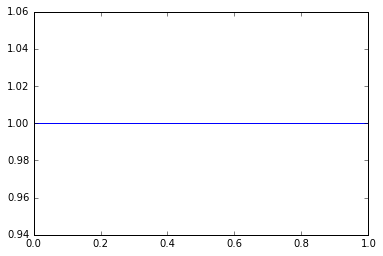

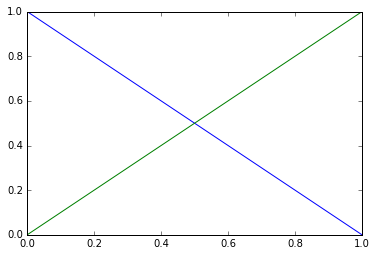

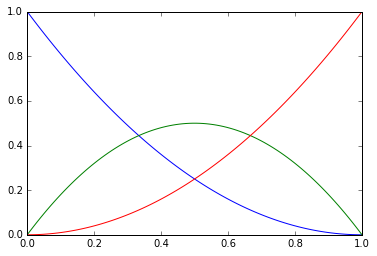

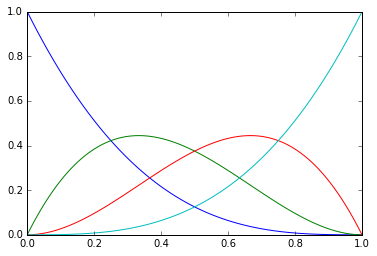

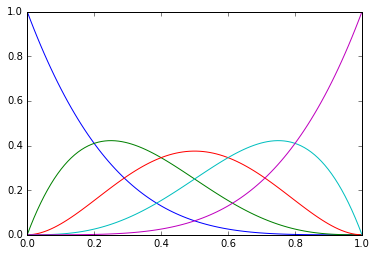

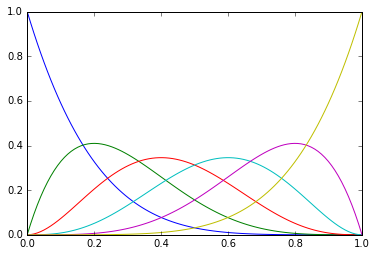

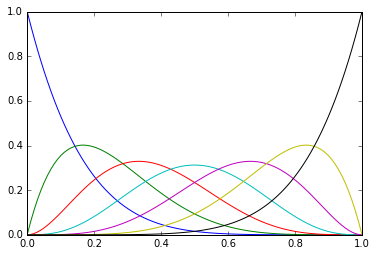

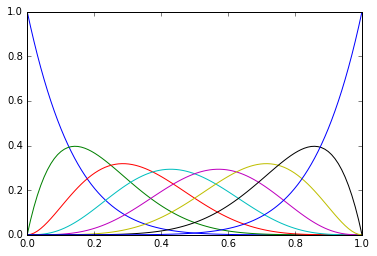

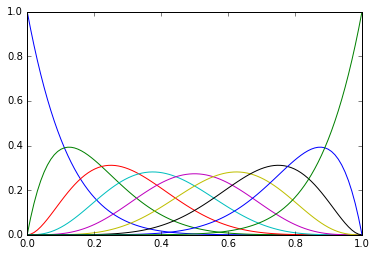

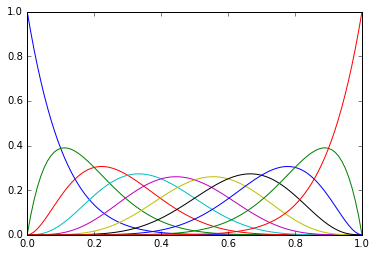

In [2]:
import numpy as np
from scipy import linalg as la
from mayavi import mlab
from matplotlib import pyplot as plt
%matplotlib inline

def prob4():
    u = np.linspace(0,1,400)
    plt.scatter(-1-u+2*u**2, -2*u+u**2,s=1)
    plt.show()
    plt.scatter(-1+2*u-u**2, -2-u+2*u**2,s=1)
    plt.show()
    
def horner(a,u0):
    """Compute point u0 on power basis curve with coefficients in a."""
    n = a.shape[0]
    C = 0
    for i in xrange(n-1,-1,-1):
        C = C*u0 + a[i]
    return C

def bernstein(i,n,u):
    """Compute the value of the B_{i,n} at the point u."""
    temp = np.zeros(n+1)
    temp[n-i] = 1.0
    u1 = 1-u
    for k in xrange(1,n+1):
        for j in xrange(n,k-1,-1):
            temp[j] = u*temp[j] + u1*temp[j-1]
    return temp[-1]

def all_bernstein(n,u):
    """Compute value of all n-th degree Bernstein polynomials at u."""
    B = np.empty(n+1)
    B[0] = 1.0
    u1 = 1.0-u
    for j in xrange(1,n+1):
        saved = 0
        for k in xrange(j):
            temp = B[k]
            B[k] = saved+u1*temp
            saved = u*temp
        B[j] = saved
    return B

def bezier_point(P,n,u):
    """Compute the point on an nth degree Bezier curve defined by the array P at u."""
    B = all_bernstein(n,u)
    C = 0.0
    for k in xrange(n+1):
        C += B[k]*P[k]
    return C
# SEEM TO WORK GUD

def test_bernstein(n):
    domain = np.linspace(0,1,100)
    vals = np.zeros((n+1,100))
    for i in xrange(100):
        vals[:,i] = all_bernstein(n, domain[i])
    for i in xrange(n+1):
        plt.plot(domain, vals[i,:])
    plt.show()
    
for i in xrange(10):
    test_bernstein(i)

def deCasteljua(P,n,u):
    """Better because doesn't require calculating Bernstein schtuff."""
    Q = np.copy(P)
    # P is an array of points; each column is a point
    for k in xrange(1,n+1):
        for i in xrange(n-k+1):
            Q[:,i] = (1.0-u)*Q[:,i] + u*Q[:,i+1]
    return Q[:,0]

def test_bezier():
    n = 3
    P = np.random.rand(2,n+1)
    #P = np.sort(P,axis=1)
    
    y = np.zeros((2,100))
    x = np.zeros((2,100))
    for i in xrange(100):
        x[:,i] = deCasteljua(P,n,0.01*i)
        #y[:,i] = bezier_point(P,n,0.02*i)
    plt.plot(x[0,:],x[1,:])
    plt.plot(P[0,:],P[1,:])
    #plt.plot(y[0,:],y[1,:])
    plt.show()

def horner2(A,m,n,u0,v0):
    """Compute point on a power basis surface; matrix A, vectors u0,v0."""
    b = np.empty(n+1)
    for i in xrange(n+1):
        b[i] = horner(A[i,:],m,v0)
    return horner(b,n,u0)

def deCasteljua2(P,n,m,u0,v0):
    if n <= m:
        # 3 because 3d points
        Q = np.zeros((3,n+1))
        for j in xrange(n+1):
            # the jth row
            Q[:,j] = deCasteljua(P[j,:],n,u0)
        return deCasteljua(Q,m,v0)
    else:
        Q = np.zeros((3,m+1))
        for i in xrange(m+1):
            Q[:,i] = deCasteljua(P[:,i].T,m,v0)
        return deCasteljua(Q,m,u0)

A = np.array([[[0,0,0],[0,2,2],[0,4,0]], 
              [[3,0,3],[3,2,5],[3,4,3]],
              [[6,0,3],[6,2,5],[6,4,3]],
              [[9,0,0],[9,2,2],[9,4,0]]],dtype=np.float);  

x = np.array([0,2,4])
y = np.array([0,3,6,9])
X, Y = np.meshgrid(x,y)
Z = np.array([[0,2,0],[3,5,3],[3,5,3],[0,2,0]])
#pt = deCasteljua2(A,3,2,1/3.,1/2.)
#mlab.points3d(pt[0],pt[1],pt[2],scale_factor=0.5)
#mlab.points3d(X, Y, Z,scale_factor=0.2)
#mlab.show()

def bezier_surface(A):
    """
    Plot the nonrational bezier surface defined by the (n+1)x(m+1)
    net of points defined by the (n+1)x(m+1)x3 matrix A.
    """
    n, m, z = A.shape
    n, m = n-1, m-1
    res = 10
    #B = np.zeros((res*res,3))
    u = np.linspace(0,1,res)
    v = np.linspace(0,1,res)
    for i in xrange(res):
        for j in xrange(res):
            #print v[i]
            print str(i)+" "+str(j)+" "+str(u[i])+" "+str(v[j]),'\r',
            pt = deCasteljua2(A,n,m,u[i],v[j])
            #print pt
            mlab.points3d(pt[0],pt[1],pt[2],scale_factor=0.1)
    mlab.points3d(A[:,:,0],A[:,:,1],A[:,:,2],scale_factor=0.5)
    mlab.show()
    
    
#bezier_surface(A)

In [3]:
UP = np.array([0,0,0,0,1,1.5,2.3,3.9,4.3,5,6.5,7,7,7,7])
p = 3
u = 3.0
k = 6
r = 2
s = 0
n = len(UP) - p - 2

mp = n + p + 1
nq = n + r

# Create new knot vector
UQ = np.zeros(mp + r + 1)
for i in xrange(k+1):
    UQ[i] = UP[i]
for i in xrange(1,r+1):
    UQ[k+i] = u
for i in xrange(k+1,mp+1):
    UQ[i+r] = UP[i]
    
print UP
print UQ

A = np.random.rand(3,5)
print A
print A[1,:]

[ 0.   0.   0.   0.   1.   1.5  2.3  3.9  4.3  5.   6.5  7.   7.   7.   7. ]
[ 0.   0.   0.   0.   1.   1.5  2.3  3.   3.   3.9  4.3  5.   6.5  7.   7.
  7.   7. ]
[[ 0.48253676  0.95097976  0.57775039  0.93229197  0.77959831]
 [ 0.16505737  0.78413431  0.70093816  0.72420597  0.69516143]
 [ 0.19335002  0.2055226   0.26572855  0.86539255  0.1881953 ]]
[ 0.16505737  0.78413431  0.70093816  0.72420597  0.69516143]


In [4]:
i, ii = 1, 2
j, jj = 10, 9

i, ii = i+1, ii+1
j, jj = j-1, jj-1

print i, ii
print j, jj

2 3
9 8


In [25]:
p = 3
U = np.array([0,0,0,0,1,2,3,4,4,4])


Ubar = []
curr = U[0]
numcurr = 1
for i in xrange(1,len(U)-1):
    # Still on the same knot
    if U[i] == curr:
        numcurr += 1
    else:
        while p - numcurr > 0:
            Ubar.append((curr,i))
            numcurr += 1
        curr = U[i]
        numcurr = 1

def alpha(i,u,U,k):
    if i < k - p:
        return 1
    elif i < k:
        return (float(u)- U[i]) / (U[i+p] - U[i])
    else:
        return 0

# Figure out how many and which knots to add to the knot vector
Ubar = []
curr = U[0]
numcurr = 1
for i in xrange(1,len(U)-1):
    # Still on the same knot
    if U[i] == curr:
        numcurr += 1
    else:
        while p - numcurr > 0:
            Ubar.append((curr,i))
            numcurr += 1
        curr = U[i]
        numcurr = 1
m = len(Ubar)


# Build global extraction operator
n = len(U) - p 
C = np.eye(n)
for j in xrange(m):
    # Get alpha(1) through alpha(n+j)
    # Need i, u, U, k
    Cj = np.zeros((n+j,n+j+1))
    for i in xrange(n+j):
        alph = alpha(i,Ubar[j][0],U,Ubar[j][1])
        if i < n+j-1:
            Cj[i,i] = alph
        if i > 0:
            Cj[i-1,i] = 1 - alph
    print Cj, '\n'
    C = np.dot(Cj.T,C.T).T

k = 0
Ce = []
while k + p + 1 <= n:
    Ce.append(C[k:k+p+1,k*p:k*p+p+1])
    k += 1

print k+1
print C.shape
print Ce

[[ 1.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.          0.5         0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.5         0.66666667  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.33333333  1.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]] 

[[ 1.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          1.          0.5         0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.5         0.66666667  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.  